<a href="https://colab.research.google.com/github/192110469/Identification-of-Pest-Infected-Coconut-Leaves/blob/main/project_code_for_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves','pest infected']
images = []
labels = []

In [ ]:
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

In [ ]:
num_iterations = 25
accuracy_history1 = []

In [ ]:
for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)  # Change the random_state in each iteration

    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)

    n_components = 50
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize and train an SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42 + iteration)
    svm_classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history1.append(accuracy)
    print(f"Iteration {iteration+1}, Accuracy: {accuracy * 100:.2f}%")

Iteration 1, Accuracy: 80.30%
Iteration 2, Accuracy: 82.99%
Iteration 3, Accuracy: 84.18%
Iteration 4, Accuracy: 81.49%
Iteration 5, Accuracy: 83.28%
Iteration 6, Accuracy: 80.90%
Iteration 7, Accuracy: 81.79%
Iteration 8, Accuracy: 80.90%
Iteration 9, Accuracy: 81.19%
Iteration 10, Accuracy: 80.00%
Iteration 11, Accuracy: 81.79%
Iteration 12, Accuracy: 81.79%
Iteration 13, Accuracy: 82.09%
Iteration 14, Accuracy: 83.28%
Iteration 15, Accuracy: 80.90%
Iteration 16, Accuracy: 81.19%
Iteration 17, Accuracy: 82.39%
Iteration 18, Accuracy: 79.70%
Iteration 19, Accuracy: 81.49%
Iteration 20, Accuracy: 80.30%
Iteration 21, Accuracy: 80.00%
Iteration 22, Accuracy: 82.09%
Iteration 23, Accuracy: 80.00%
Iteration 24, Accuracy: 80.00%
Iteration 25, Accuracy: 80.60%


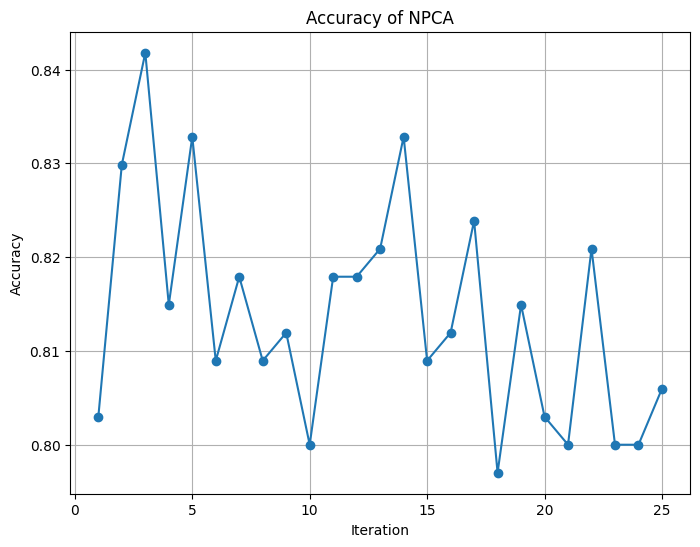

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), accuracy_history1, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy of NPCA')
plt.grid(True)
plt.show()

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [ ]:
data_dir = '/content/drive/MyDrive/datasets for coconut leaves'
categories = ['healthy leaves', 'pest infected']
images = []
labels = []

In [ ]:
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
        img = cv2.resize(img, (100, 100))  # Resize the image to a consistent size
        images.append(img)
        labels.append(class_num)

images = np.array(images)
labels = np.array(labels)

In [ ]:
num_iterations = 25
accuracy_history = []

In [ ]:
for iteration in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42 + iteration)  # Change the random_state in each iteration

    # Normalize the image data to values between 0 and 1
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Define a simple CNN model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))  # 2 output classes

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracy_history.append(test_accuracy)
    print(f"Iteration {iteration+1}, Test Accuracy: {test_accuracy * 100:.2f}%")

Iteration 1, Test Accuracy: 85.67%
Iteration 2, Test Accuracy: 87.16%
Iteration 3, Test Accuracy: 90.15%
Iteration 4, Test Accuracy: 85.37%
Iteration 5, Test Accuracy: 83.58%
Iteration 6, Test Accuracy: 85.97%
Iteration 7, Test Accuracy: 84.78%
Iteration 8, Test Accuracy: 86.87%
Iteration 9, Test Accuracy: 88.06%
Iteration 10, Test Accuracy: 83.28%
Iteration 11, Test Accuracy: 78.21%
Iteration 12, Test Accuracy: 83.58%
Iteration 13, Test Accuracy: 82.39%
Iteration 14, Test Accuracy: 84.18%
Iteration 15, Test Accuracy: 81.49%
Iteration 16, Test Accuracy: 77.91%
Iteration 17, Test Accuracy: 83.88%
Iteration 18, Test Accuracy: 84.48%
Iteration 19, Test Accuracy: 84.48%
Iteration 20, Test Accuracy: 78.81%
Iteration 21, Test Accuracy: 83.58%
Iteration 22, Test Accuracy: 86.87%
Iteration 23, Test Accuracy: 81.49%
Iteration 24, Test Accuracy: 84.48%
Iteration 25, Test Accuracy: 77.91%


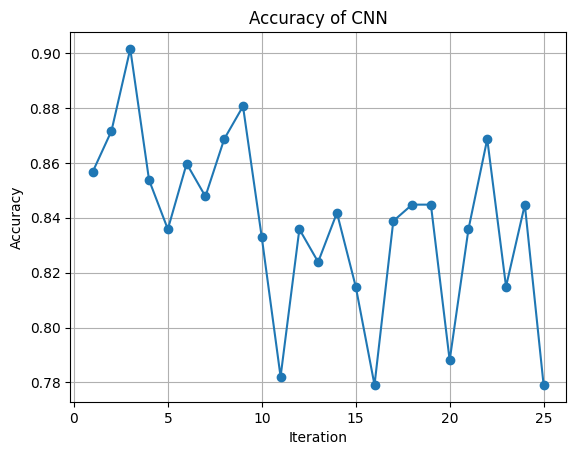

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_iterations + 1), accuracy_history, marker='o')
plt.title('Accuracy of CNN')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (25,) and (36,)

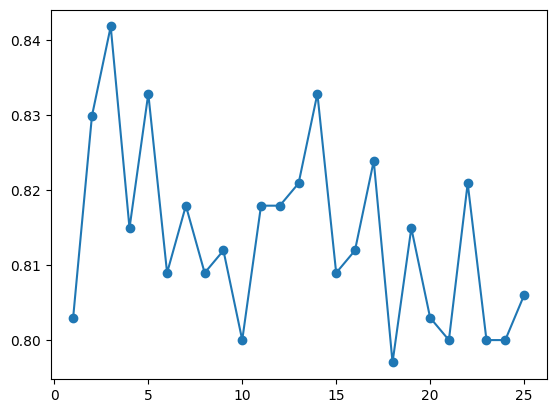

In [ ]:
import matplotlib.pyplot as plt

# Plot PCA algorithm accuracy
plt.plot(range(1, num_iterations + 1), accuracy_history1, label='CNN Algorithm', marker='o')

# Plot CNN algorithm accuracy
plt.plot(range(1, num_iterations + 1), accuracy_history, label='NPCA Algorithm', marker='o')

# Add labels and title to the plot
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: NPCA vs. CNN')
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

# Set the number of desired iterations
num_iterations = 10
accuracy_history = []  # To store accuracy for each iteration

for iteration in range(num_iterations):
    # Initialize and train an SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
    svm_classifier.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = svm_classifier.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)

    print(f"Iteration {iteration + 1}, Accuracy: {accuracy * 100:.2f}%")

# Plot accuracy history
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), accuracy_history, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')
plt.grid(True)
plt.show()